In [57]:
import pandas as pd
from Functions import standardize
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster 
import  matplotlib.pyplot as plt
import seaborn as sns


In [58]:
df = pd.read_csv("./Dataset/Clean.csv")
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000


In [59]:
## df_standard = standardize(df)
## df_standard.head()

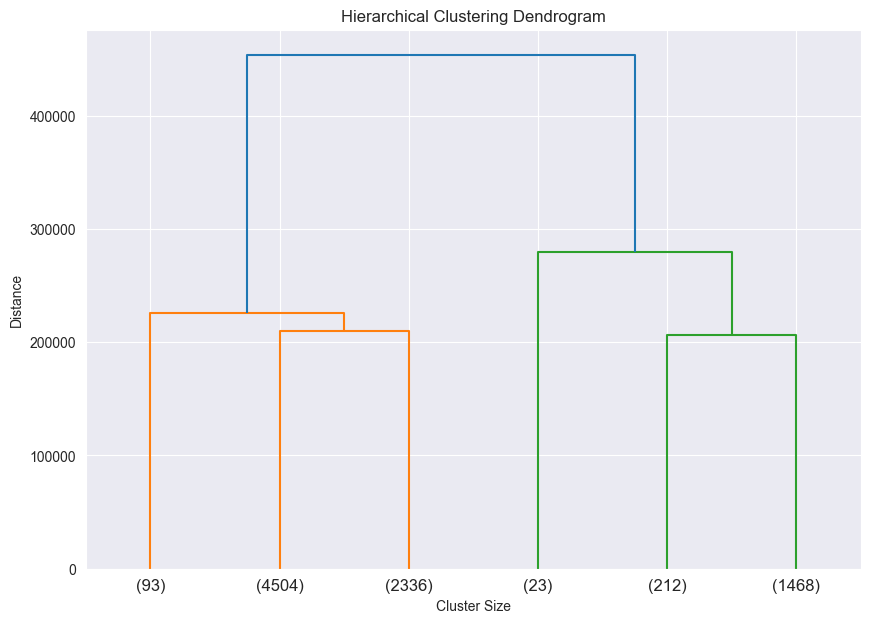

In [60]:
# Perform hierarchical clustering
linkage_matrix = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=6)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [61]:
# Cut the dendrogram, with distance threshold
threshold_distance = 250000
clusters = fcluster(linkage_matrix, threshold_distance, criterion='distance')

# Add cluster labels
df['Cluster'] = clusters

In [62]:
# Check the resulting clusters
print(df[['Cluster']].head())
print(df['Cluster'].value_counts())
cluster_summary = df.groupby('Cluster').mean()

print(cluster_summary)

   Cluster
0        1
1        3
2        1
3        1
4        1
Cluster
1    6933
3    1680
2      23
Name: count, dtype: int64
             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                   
1        1060.756824           0.886086    697.335602        367.028448   
2        4812.382778           0.956126  27505.339565      22417.452174   
3        3787.658519           0.931129   2016.902619       1287.928089   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
1                    330.676830    595.048116             0.484637   
2                   5087.887391   1617.786145             0.905072   
3                    729.048143   2632.751277             0.537292   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                               

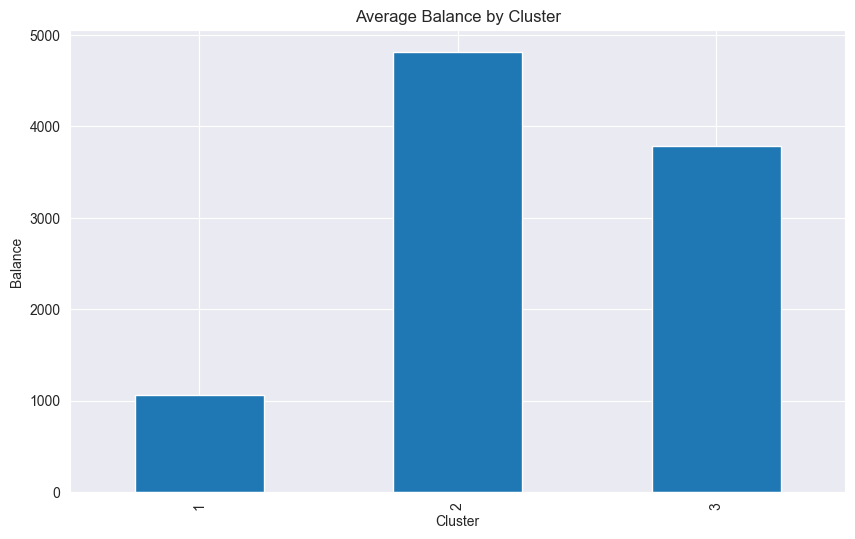

In [63]:
cluster_summary['BALANCE'].plot(kind='bar', title='Average Balance by Cluster', figsize=(10, 6))
plt.ylabel('Balance')
plt.show()

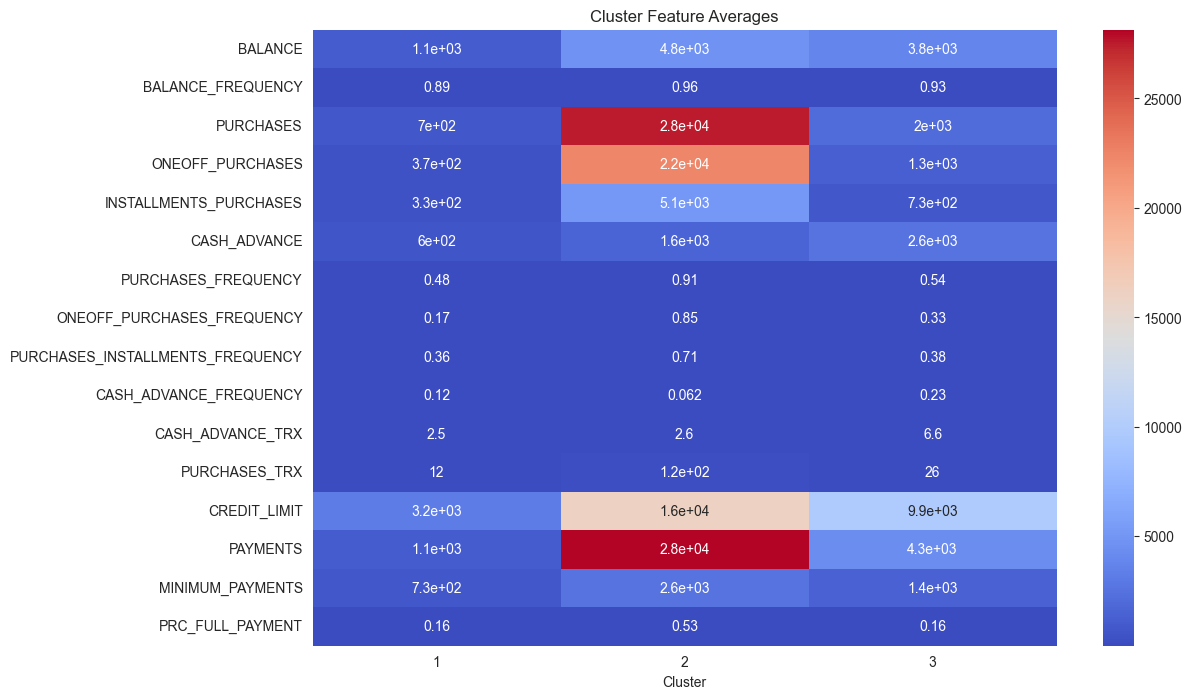

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary.T, cmap='coolwarm', annot=True)
plt.title('Cluster Feature Averages')
plt.show()